# Creating surfaces
In this notebook we create a surface mesh from a 3D dataset of a Gastruloid. The used example data is a curtesy of [AV Luque and JV Veenvliet (2023)](https://zenodo.org/record/7603081) licensed [CC-BY](https://creativecommons.org/licenses/by/4.0/legalcode) and can be downloaded from here: https://zenodo.org/record/7603081

In [1]:
import napari_process_points_and_surfaces as nppas

import stackview
from skimage.io import imread
import pyclesperanto_prototype as cle
import napari_simpleitk_image_processing as nsitk
import vedo

In [2]:
filename = r"C:\Users\johamuel\Desktop\local_data\gastruloid\Example Gastruloids DAPI Channel\19052022_mGast_A1-12_Norm_NMRI_ES+LIF_01.vsi - 640-mFoxa2, 561-gSox2, 488-rbT, 405-Dapi-1.tif"

In [3]:
image = imread(filename)
image.shape

(61, 3889, 5732)

In [4]:
# todo: as soon as this issue is solved: We could read 
# voxel size from the image using AICSImageIO
# https://github.com/AllenCellModeling/aicsimageio/issues/450
voxel_size = [5, 0.325, 0.325]

In [5]:
image.shape

(61, 3889, 5732)

## Scaling data to be isotropic
We first scale the dataset to be [isotropic](https://en.wikipedia.org/wiki/Anisotropy). This simplifies processing of the image and the surface later, because voxels have the same size in all directions.

In [6]:
# sample first by skipping pixels. This is necessary if the original image is too big to fit in GPU memory.
f = 4
image = image[:,::4, ::4]
image.shape

(61, 973, 1433)

In [7]:
voxel_size = [voxel_size[0], voxel_size[1] * f, voxel_size[2] * f]
voxel_size

[5, 1.3, 1.3]

cl.OCLArray([[[ 71.95401 ,  70.61403 ,  70.30985 , ...,  70.16341 ,
          70.68801 ,  73.600006],
        [ 70.71207 ,  70.67808 ,  69.53891 , ...,  69.37021 ,
          70.48726 ,  68.15814 ],
        [ 69.88608 ,  71.62378 ,  71.533356, ...,  68.36906 ,
          72.79523 ,  72.348206],
        ...,
        [ 73.12239 ,  67.90983 ,  70.053764, ...,  70.64734 ,
          73.041046,  66.61377 ],
        [ 68.95499 ,  71.73684 ,  70.636116, ...,  75.3654  ,
          70.44629 ,  67.94713 ],
        [ 69.70147 ,  71.70129 ,  70.128944, ...,  69.34642 ,
          69.345566,  72.35647 ]],

       [[102.87892 , 101.168   , 100.46717 , ..., 100.338486,
         101.1328  , 105.30533 ],
        [101.20225 , 101.32062 ,  99.50842 , ...,  99.43291 ,
         100.93178 ,  97.31997 ],
        [ 99.91273 , 102.504326, 102.281654, ...,  97.54721 ,
         103.89514 , 103.147545],
        ...,
        [104.283104,  97.84643 , 100.03795 , ..., 101.50614 ,
         104.058655,  95.60405 ],
        [ 98.71478 , 102.58598 , 100.83383 , ..., 107.49039 ,
         100.64844 ,  96.927826],
        [ 99.7139  , 102.46955 , 100.42888 , ...,  99.53983 ,
          99.45468 , 103.42943 ]],

       [[102.77153 , 101.866714, 100.12309 , ..., 100.31122 ,
         101.27832 , 105.48181 ],
        [101.485245, 102.2587  ,  99.728584, ..., 100.303345,
         101.41504 ,  96.701675],
        [ 99.77121 , 102.78019 , 102.19129 , ...,  96.6371  ,
         103.05469 , 101.88226 ],
        ...,
        [103.129074, 100.68672 ,  99.44681 , ..., 103.34451 ,
         102.48047 ,  96.91901 ],
        [ 99.09766 , 102.54785 , 100.09766 , ..., 106.333984,
         100.25    ,  95.95508 ],
        [ 99.828125, 102.1741  , 100.9496  , ..., 100.96323 ,
         100.54883 , 103.223694]],

       ...,

       [[103.64664 , 101.29195 , 102.69681 , ...,  99.827774,
         101.47602 ,  98.70683 ],
        [101.25668 ,  99.507355, 100.38222 , ..., 101.926125,
          99.746185,  96.59638 ],
        [ 99.52463 , 100.31619 ,  99.86493 , ...,  98.61756 ,
         101.748795, 100.2474  ],
        ...,
        [102.06863 , 101.32311 ,  99.131134, ..., 103.552734,
         101.134674,  97.88841 ],
        [ 99.315956,  99.9043  , 101.50961 , ..., 101.69159 ,
          98.72949 , 101.05678 ],
        [ 99.802605, 102.48386 ,  99.0108  , ...,  98.40378 ,
          99.53929 , 102.4868  ]],

       [[104.201965, 101.47368 , 101.881226, ...,  99.84035 ,
         101.69781 ,  99.18958 ],
        [102.07008 , 100.22797 ,  99.81741 , ..., 102.098656,
          99.59366 ,  96.87484 ],
        [101.62712 , 100.8232  ,  99.545685, ...,  97.67876 ,
         101.731674,  98.31361 ],
        ...,
        [101.552986, 101.16551 ,  98.12259 , ..., 103.16925 ,
         102.48251 ,  96.56508 ],
        [ 98.58834 ,  99.9043  , 101.033356, ..., 101.386536,
         101.02051 , 101.92369 ],
        [100.02841 , 103.35632 ,  98.492584, ...,  99.96701 ,
         100.25368 , 100.45887 ]],

       [[ 93.9956  ,  91.291   ,  90.98075 , ...,  89.708855,
          91.51955 ,  89.44306 ],
        [ 92.25527 ,  90.53731 ,  89.29664 , ...,  91.84629 ,
          89.37523 ,  87.22485 ],
        [ 92.73159 ,  90.92721 ,  89.219055, ...,  87.121544,
          91.38794 ,  87.017075],
        ...,
        [ 90.88928 ,  90.784   ,  87.472984, ...,  92.43104 ,
          92.98828 ,  85.86017 ],
        [ 88.08197 ,  89.75777 ,  90.44914 , ...,  90.88257 ,
          92.31445 ,  92.160034],
        [ 90.02243 ,  93.450935,  88.137955, ...,  90.874344,
          90.55618 ,  88.88061 ]]], dtype=float32)
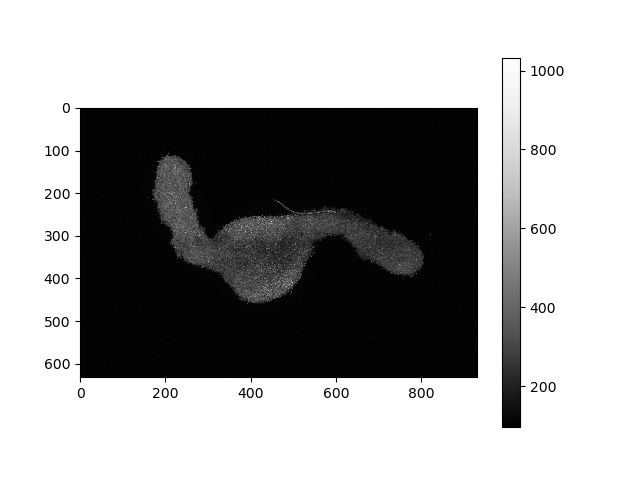
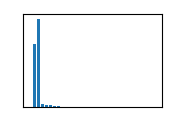

In [8]:
zoom = 0.5

scaled = cle.scale(image, 
                   factor_x=voxel_size[2] * zoom,
                   factor_y=voxel_size[1] * zoom,
                   factor_z=voxel_size[0] * zoom,
                   auto_size=True,
                   linear_interpolation=True
                  )
scaled

## Binarization
We then turn the dataset into a binary image to turn it into a surface afterwards.

cl.OCLArray([[[84.67202 , 84.59865 , 84.524666, ..., 84.69388 , 84.76255 ,
         84.83618 ],
        [84.608284, 84.54781 , 84.48683 , ..., 84.5616  , 84.6123  ,
         84.66794 ],
        [84.550316, 84.50203 , 84.453255, ..., 84.43853 , 84.471756,
         84.50985 ],
        ...,
        [84.33018 , 84.317024, 84.30489 , ..., 84.55783 , 84.53768 ,
         84.51575 ],
        [84.22723 , 84.22326 , 84.22106 , ..., 84.596535, 84.58808 ,
         84.57826 ],
        [84.12429 , 84.12977 , 84.13773 , ..., 84.643555, 84.64879 ,
         84.65315 ]],

       [[87.09507 , 87.02438 , 86.95261 , ..., 87.03906 , 87.09887 ,
         87.16345 ],
        [87.02884 , 86.97157 , 86.913246, ..., 86.919876, 86.963196,
         87.011246],
        [86.96819 , 86.923515, 86.8779  , ..., 86.81019 , 86.83762 ,
         86.86982 ],
        ...,
        [86.73181 , 86.72637 , 86.72123 , ..., 86.977554, 86.95685 ,
         86.93427 ],
        [86.6298  , 86.63363 , 86.63848 , ..., 87.015495, 87.00499 ,
         86.99291 ],
        [86.527954, 86.54126 , 86.55628 , ..., 87.06138 , 87.06299 ,
         87.06342 ]],

       [[89.472885, 89.40493 , 89.335304, ..., 89.32089 , 89.370186,
         89.42392 ],
        [89.40412 , 89.35002 , 89.294365, ..., 89.21658 , 89.25107 ,
         89.29006 ],
        [89.34077 , 89.29972 , 89.25722 , ..., 89.122055, 89.14258 ,
         89.16759 ],
        ...,
        [89.08777 , 89.090065, 89.091896, ..., 89.347725, 89.32702 ,
         89.30428 ],
        [88.98673 , 88.998375, 89.01026 , ..., 89.384445, 89.3724  ,
         89.358536],
        [88.88595 , 88.907196, 88.929306, ..., 89.42867 , 89.42708 ,
         89.42398 ]],

       ...,

       [[97.46906 , 97.37495 , 97.27908 , ..., 96.43476 , 96.418335,
         96.40135 ],
        [97.3704  , 97.29221 , 97.212616, ..., 96.41012 , 96.39268 ,
         96.37532 ],
        [97.27479 , 97.212006, 97.14818 , ..., 96.39377 , 96.37597 ,
         96.35889 ],
        ...,
        [96.7042  , 96.75606 , 96.80539 , ..., 96.738686, 96.7351  ,
         96.732315],
        [96.65901 , 96.71674 , 96.77209 , ..., 96.70139 , 96.69861 ,
         96.69728 ],
        [96.61512 , 96.67895 , 96.74069 , ..., 96.66327 , 96.6608  ,
         96.66053 ]],

       [[96.725716, 96.620605, 96.51406 , ..., 95.61706 , 95.59154 ,
         95.56504 ],
        [96.61503 , 96.527664, 96.439224, ..., 95.58955 , 95.563774,
         95.53771 ],
        [96.50735 , 96.43719 , 96.36637 , ..., 95.57088 , 95.54562 ,
         95.52071 ],
        ...,
        [95.89884 , 95.951706, 96.00218 , ..., 95.88361 , 95.88057 ,
         95.879036],
        [95.85945 , 95.917336, 95.972984, ..., 95.83202 , 95.82967 ,
         95.829666],
        [95.82139 , 95.88453 , 95.94573 , ..., 95.77918 , 95.777   ,
         95.77809 ]],

       [[95.967575, 95.85142 , 95.73413 , ..., 94.780975, 94.74603 ,
         94.70967 ],
        [95.84552 , 95.74885 , 95.65143 , ..., 94.75142 , 94.71716 ,
         94.682175],
        [95.72631 , 95.648605, 95.57057 , ..., 94.7312  , 94.69844 ,
         94.665634],
        ...,
        [95.07924 , 95.133095, 95.18468 , ..., 95.01222 , 95.00973 ,
         95.00938 ],
        [95.04578 , 95.103836, 95.15979 , ..., 94.94634 , 94.94446 ,
         94.9457  ],
        [95.013664, 95.076195, 95.13689 , ..., 94.87879 , 94.876945,
         94.879326]]], dtype=float32)
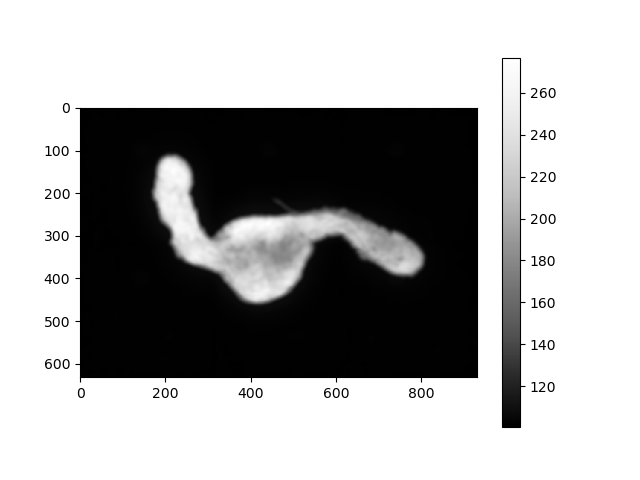
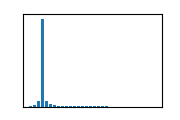

In [9]:
sigma = 5
blurred = cle.gaussian_blur(scaled, 
                            sigma_x=sigma,
                            sigma_y=sigma,
                            sigma_z=sigma,
                           )
blurred

cl.OCLArray([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
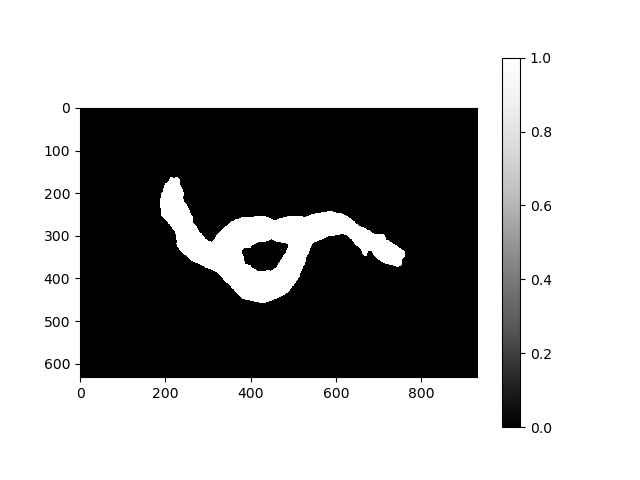
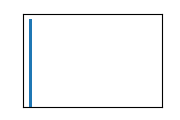

In [10]:
binary = blurred > blurred.max() * 0.5
binary[75]

In case the object has inner holes, we should fill them to prevent inner surfaces being generated.

StackViewNDArray([[0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
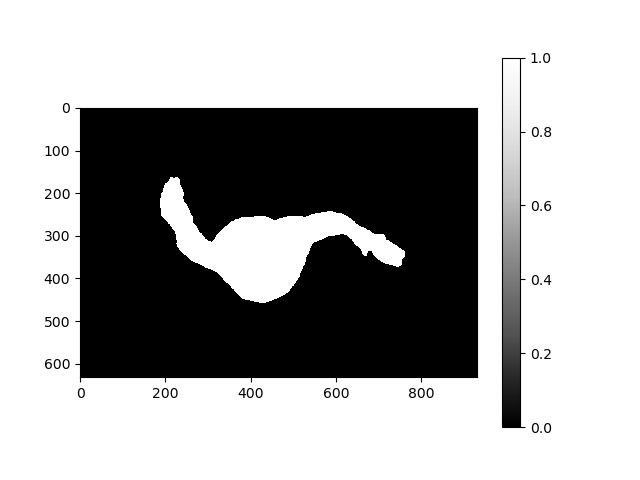
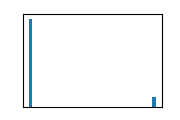

In [11]:
binary_filled = nsitk.binary_fill_holes(binary)
binary_filled[75]

## Generating surfaces
We first generate a surface forom the binary image.

In [12]:
surface = nppas.all_labels_to_surface(binary_filled)

label 1


The resulting object is visualized in Jupyter notebooks like this:

(array([[ 12.5, 215. , 224. ],
        [ 13. , 215. , 223.5],
        [ 13. , 214.5, 224. ],
        ...,
        [113.5, 356. , 423. ],
        [113.5, 356. , 424. ],
        [113.5, 356. , 425. ]], dtype=float32),
 array([[     0,      1,      2],
        [     2,      3,      0],
        [     4,      5,      6],
        ...,
        [331995, 332234, 331993],
        [332235, 332234, 331995],
        [331966, 332235, 331995]], dtype=int64))
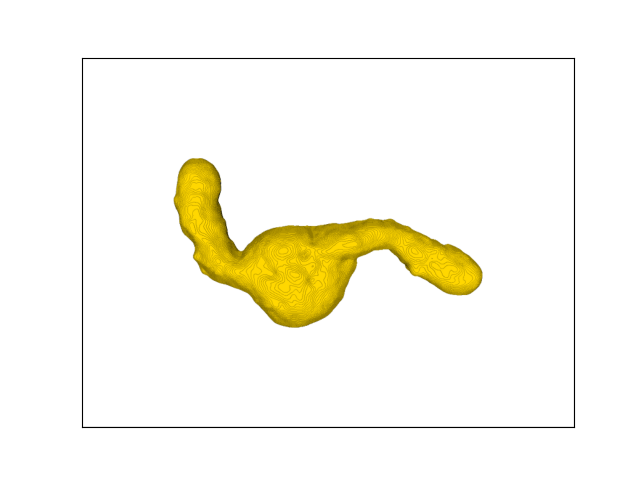

In [13]:
surface

As `> 100000` faces are a bit heavy, we simplify the mesh.

(array([[ 13.672894, 225.78377 , 226.81433 ],
        [ 12.98147 , 216.02484 , 221.87926 ],
        [ 13.553347, 216.44717 , 230.88072 ],
        ...,
        [111.604095, 364.20828 , 421.65466 ],
        [112.69895 , 355.30533 , 418.0452  ],
        [113.278946, 355.20245 , 429.2559  ]], dtype=float32),
 array([[   0,    1,    2],
        [   3,    4,    5],
        [   6,    7,    5],
        ...,
        [3317, 3316, 3323],
        [3319, 3317, 3323],
        [3323, 3316, 3322]], dtype=int64))
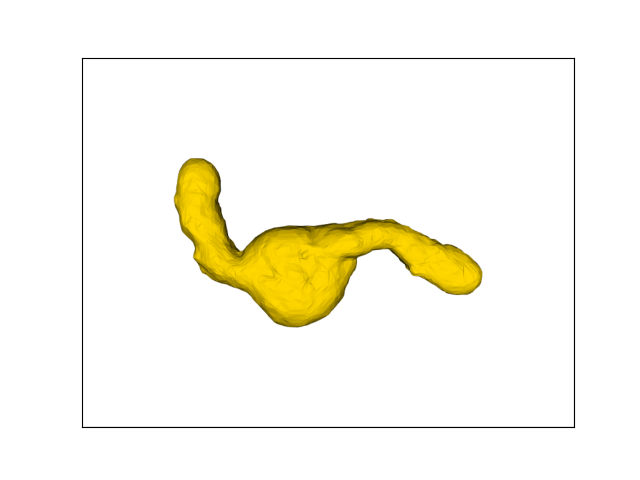

In [14]:
simplified_surface = nppas.decimate_quadric(surface, fraction=0.01)
simplified_surface

(array([[ 14.350394, 221.35675 , 223.2481  ],
        [ 13.600919, 214.09854 , 223.51843 ],
        [ 14.231933, 216.11433 , 228.1628  ],
        ...,
        [112.20171 , 359.52307 , 422.63684 ],
        [112.8559  , 352.98904 , 417.78912 ],
        [112.88503 , 351.54105 , 423.1745  ]], dtype=float32),
 array([[   0,    1,    2],
        [   3,    4,    5],
        [   6,    7,    5],
        ...,
        [3317, 3316, 3323],
        [3319, 3317, 3323],
        [3323, 3316, 3322]], dtype=int64))
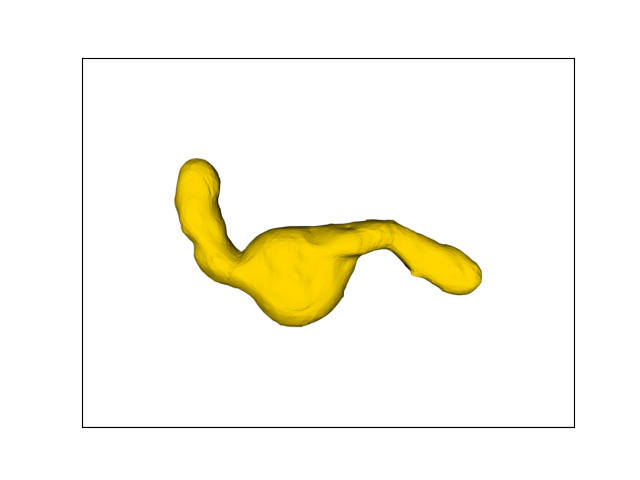

In [15]:
smoothed_surface = nppas.smooth_surface(simplified_surface)
smoothed_surface

## Saving surfaces to disk

In [16]:
mesh = nppas.to_vedo_mesh(smoothed_surface)

filename = "../napari_process_points_and_surfaces/data/gastruloid.ply"

_ = vedo.write(mesh, filename)

## Loading meshes from disk

In [17]:
new_mesh = vedo.load(filename)

(array([[ 14.350394, 221.35675 , 223.2481  ],
        [ 13.600919, 214.09854 , 223.51843 ],
        [ 14.231933, 216.11433 , 228.1628  ],
        ...,
        [112.20171 , 359.52307 , 422.63684 ],
        [112.8559  , 352.98904 , 417.78912 ],
        [112.88503 , 351.54105 , 423.1745  ]], dtype=float32),
 array([[   0,    1,    2],
        [   3,    4,    5],
        [   6,    7,    5],
        ...,
        [3317, 3316, 3323],
        [3319, 3317, 3323],
        [3323, 3316, 3322]], dtype=int64))
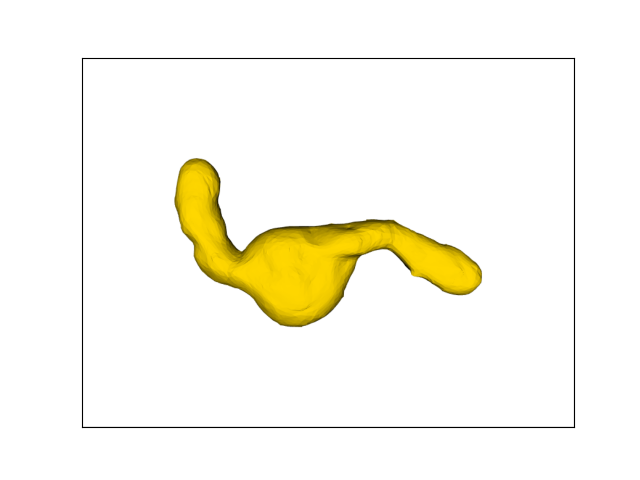

In [18]:
new_surface = nppas.to_napari_surface_data(new_mesh)
new_surface